In [3]:
import datetime

import netCDF4
import pandas as pd
import xarray as xr
import matplotlib as mpl
import cdsapi
import numpy as np
import seaborn as sns
import warnings
import geopandas as gp
import regionmask
import matplotlib.pyplot as plt
import pandas as pd
warnings.filterwarnings('ignore')
from tabulate import tabulate
plt.style.use('default')
import cftime
import cartopy.crs as ccrs
import pvlib
import os
from global_land_mask import globe
import CMIP6_light_map

#xr.set_options(display_style="html")

[CMIP6_plot] Created plot bias_correct/CMIP6_light_ghi_clim.png 


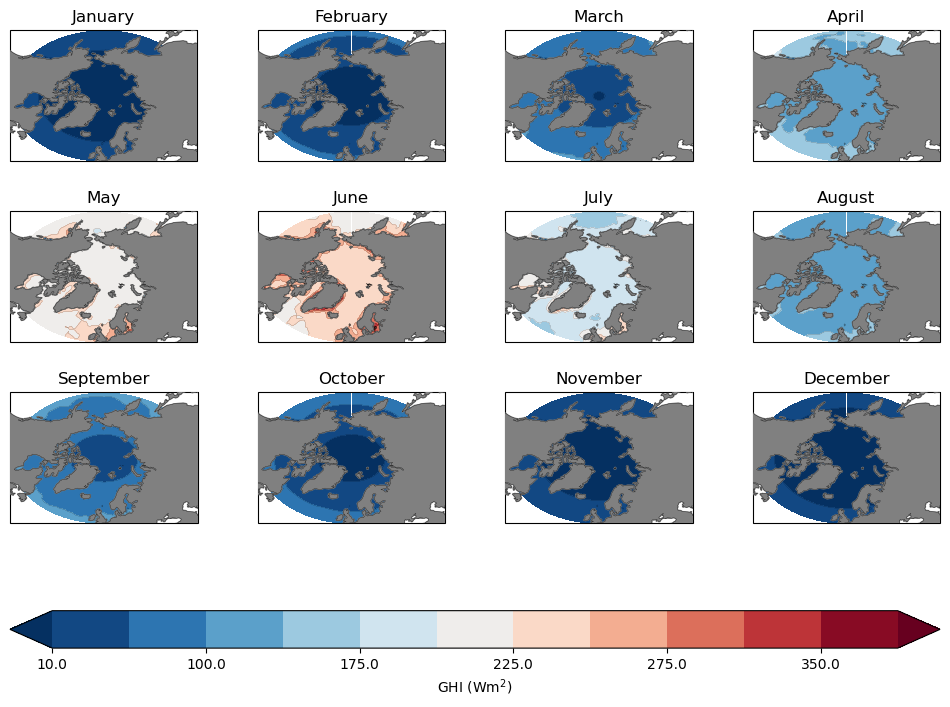

NameError: name 'era5_out' is not defined

In [4]:
%%time
scenarios=["ssp585"]
ensemble_id="r1i1p1f1"
period="2000-01-01-2099-12-16"
start_time="2000-01-01"
end_time="2099-12-16"

models=["MPI-ESM1-2-HR"]
era_var_name="msdwswrf"
ds_var_name1="ghi"

# Calculate the monthly bias between ERA5 and CMIP6_light calculations of GHI.
# These values will be used to bias correct the new CMIP6_light runs for GHI.

create_bias_file=False

in_era5 = xr.open_dataset("bias_correct/climatology_monthly_era5_{}.nc".format(era_var_name))
in_ghi = xr.open_dataset("bias_correct/climatology_monthly_ghi.nc")


if create_bias_file:
    # Interpolate the ERA5 climatology to CMIP6_light grid
    import xesmf as xe
    regridder = xe.Regridder(in_era5, in_ghi, "bilinear",
                                         periodic=True,
                                         extrap_method='inverse_dist',
                                         extrap_num_src_pnts=10,
                                         extrap_dist_exponent=1,
                                         ignore_degenerate=True)
    era5_out = regridder(in_era5)
    era5_out=era5_out.rename({"msdwswrf":"ghi"})
    bias = era5_out-in_ghi

    bias_file="bias_correct/ghi_deltas.nc"
    if os.path.exists(bias_file): os.remove(bias_file)
    bias.to_netcdf(bias_file)

CMIP6_light_map.plot_monthly_climatology(in_ghi["ghi"],"ghi",
                             "bias_correct",
                             prefix="CMIP6_light")

CMIP6_light_map.plot_monthly_climatology(era5_out["ghi"],era_var_name,
                             "bias_correct",
                             prefix="ERA5")
print(bias)

#bias=bias.rename({"ghi":"bias"})
print(bias)
CMIP6_light_map.plot_monthly_climatology(bias,"bias",
                             "bias_correct",
                             prefix="BIAS")
